<a href="https://colab.research.google.com/github/Pradeep1070/Seoul-Bike-Sharing-Demand-Prediction/blob/main/EDA_seoul_bike_rental_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Set

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Practises/Seoul bike rental predciton/SeoulBikeData.csv', encoding='Latin-1').drop(['Date','Holiday','Seasons'], axis=1)
df.columns = cols
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [ ]:
df.shape

(8760, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bike_count   8760 non-null   int64  
 1   hour         8760 non-null   int64  
 2   temp         8760 non-null   float64
 3   humidity     8760 non-null   int64  
 4   wind         8760 non-null   float64
 5   visibility   8760 non-null   int64  
 6   dew_pt_temp  8760 non-null   float64
 7   radiation    8760 non-null   float64
 8   rain         8760 non-null   float64
 9   snow         8760 non-null   float64
 10  functional   8760 non-null   object 
dtypes: float64(6), int64(4), object(1)
memory usage: 752.9+ KB


In [ ]:
df.describe()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


### **EDA**

In [5]:
df['hour'] = df['hour'].astype('category') #yes to 1 and everythiing else to zero
df['functional'] = df['functional'].astype('category') #yes to 1 and everythiing else to zero
df.head()

,bike_count,hour,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [6]:
features = df.iloc[:,1:]
target = df['bike_count']

cat_features = features.select_dtypes(exclude='number')
num_features = features.select_dtypes(include='number')

***univariate analysis***

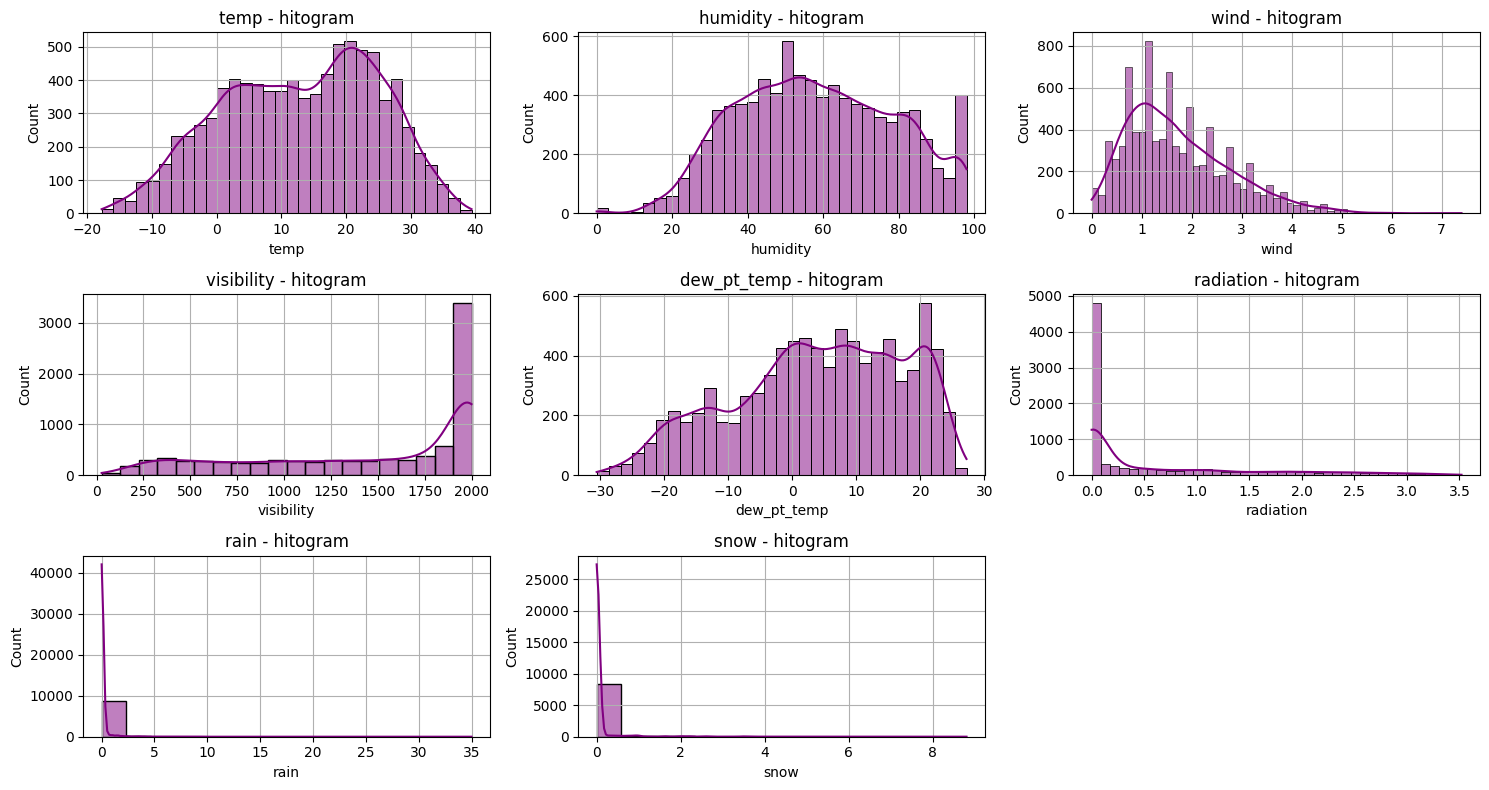

In [10]:
num_plots = len(num_features.columns)
num_cols = 3 #plots_per_col
if num_plots % num_cols>0:
  num_rows = (num_plots // num_cols) + 1
else:
  num_rows = (num_plots // num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for i, column in enumerate(num_features.columns):
    sns.histplot(num_features[column], kde=True, color='purple', ax=axes[i])
    axes[i].set_title(f'{column} - hitogram')
    # axes[i].set_xlabel(column)
    # axes[i].set_ylabel('bike_count')
    axes[i].grid(True)

# Hide unused subplots
for j in range(num_plots, num_rows * num_cols): #empty plots range
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

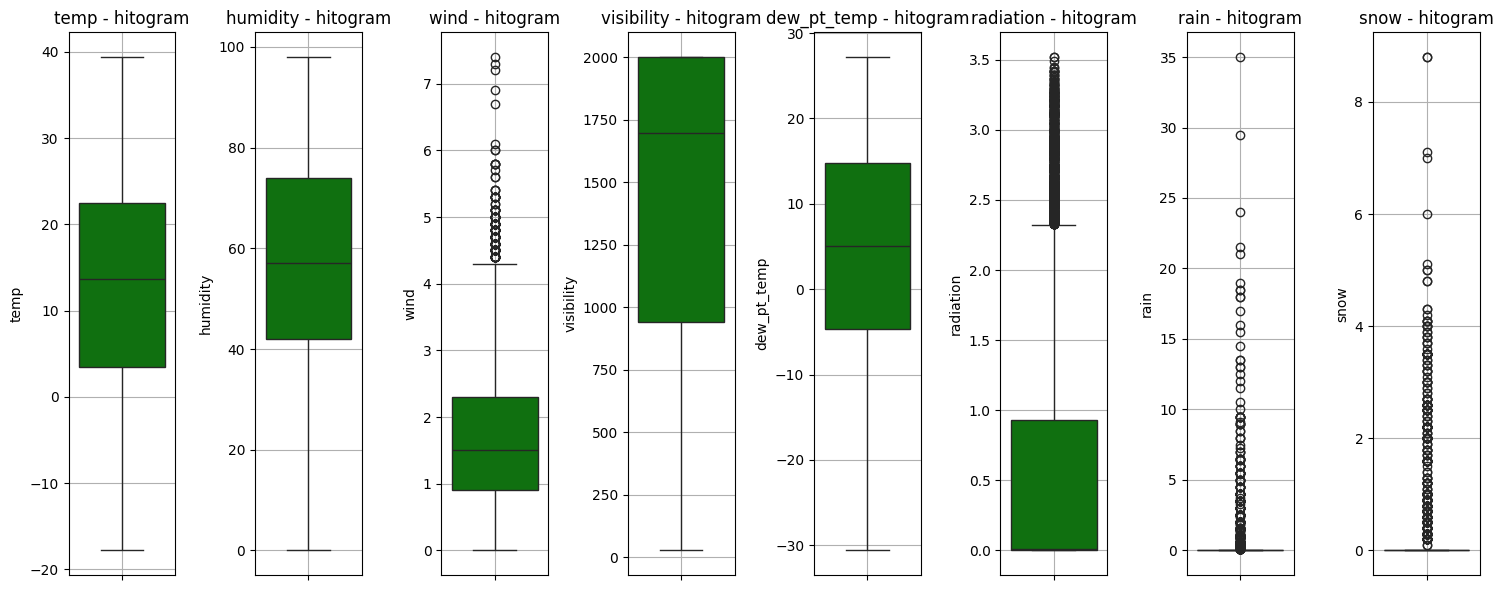

In [15]:
num_plots = len(num_features.columns)
num_cols = 8 #plots_per_col
if num_plots % num_cols>0:
  num_rows = (num_plots // num_cols) + 1
else:
  num_rows = (num_plots // num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 6))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for i, column in enumerate(num_features.columns):
    sns.boxplot(num_features[column], color='green', ax=axes[i])
    axes[i].set_title(f'{column} - hitogram')
    # axes[i].set_xlabel(column)
    # axes[i].set_ylabel('bike_count')
    axes[i].grid(True)

# Hide unused subplots
for j in range(num_plots, num_rows * num_cols): #empty plots range
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

***Bivariate analysis***




plotting numerical columns with target variable

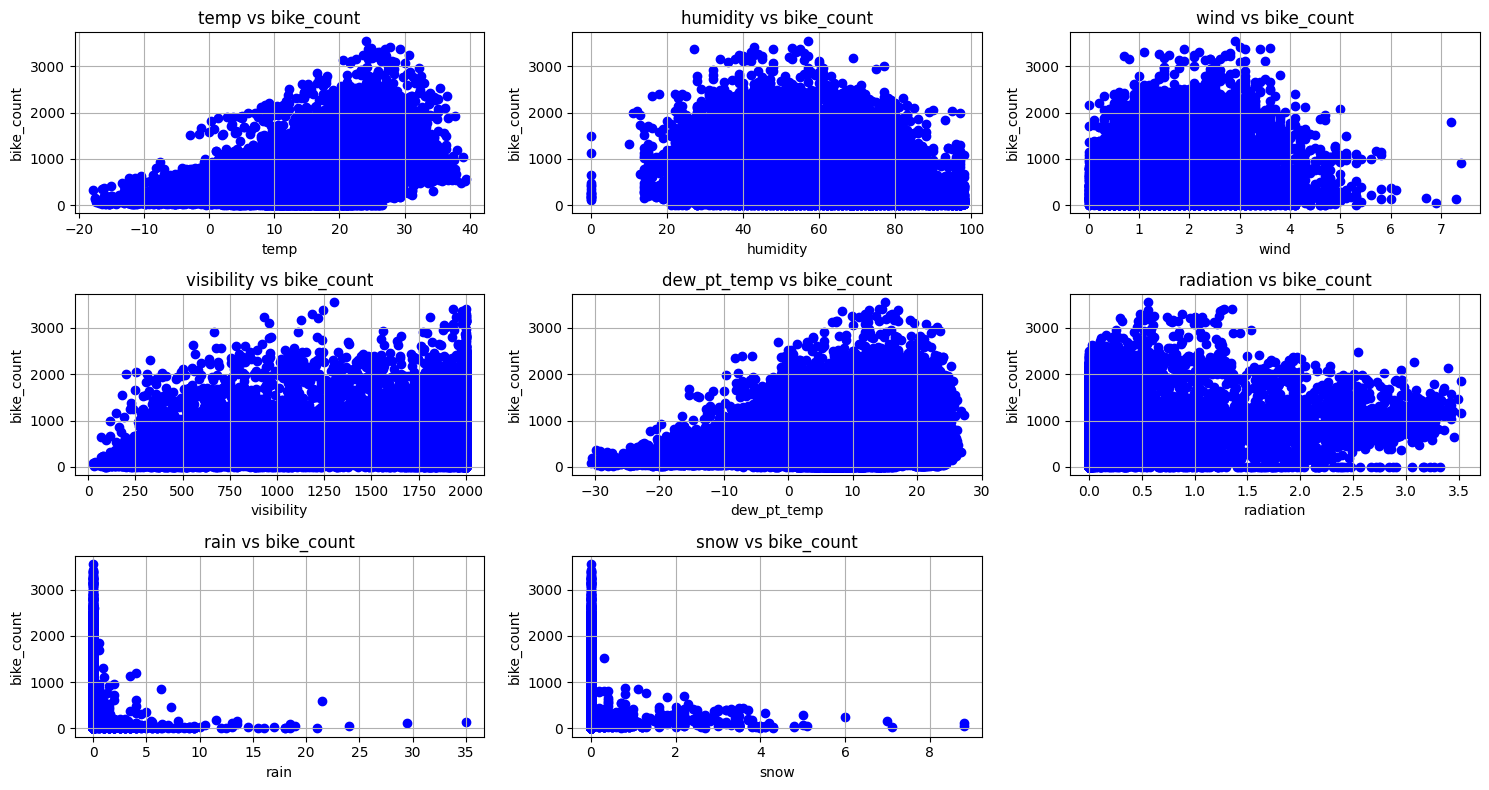

In [ ]:
num_plots = len(num_features.columns)
num_cols = 3 #plots_per_col
if num_plots % num_cols>0:
  num_rows = (num_plots // num_cols) + 1
else:
  num_rows = (num_plots // num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for i, column in enumerate(num_features.columns):
    axes[i].scatter(num_features[column], target, color='blue')
    axes[i].set_title(f'{column} vs bike_count')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('bike_count')
    axes[i].grid(True)

# Hide unused subplots
for j in range(num_plots, num_rows * num_cols): #empty plots range
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

plotting categorcial columns with target variable

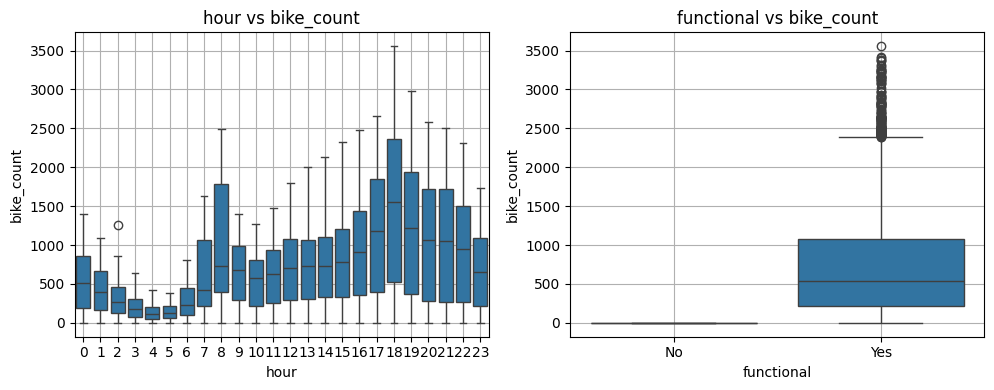

In [ ]:
num_plots = len(cat_features.columns)
num_cols = 3 #plots_per_col
if num_plots % num_cols>0:
  num_rows = (num_plots // num_cols) + 1
else:
  num_rows = (num_plots // num_cols)

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 4))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for i, column in enumerate(cat_features.columns):
    sns.boxplot(x=column, y='bike_count', data=df, ax=axes[i])
    axes[i].set_title(f'{column} vs bike_count')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('bike_count')
    axes[i].grid(True)

# Hide unused subplots
for j in range(num_plots, num_rows * num_cols): #empty plots range
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

correlation heatmap


<ipython-input-14-298dbe4c3d0a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


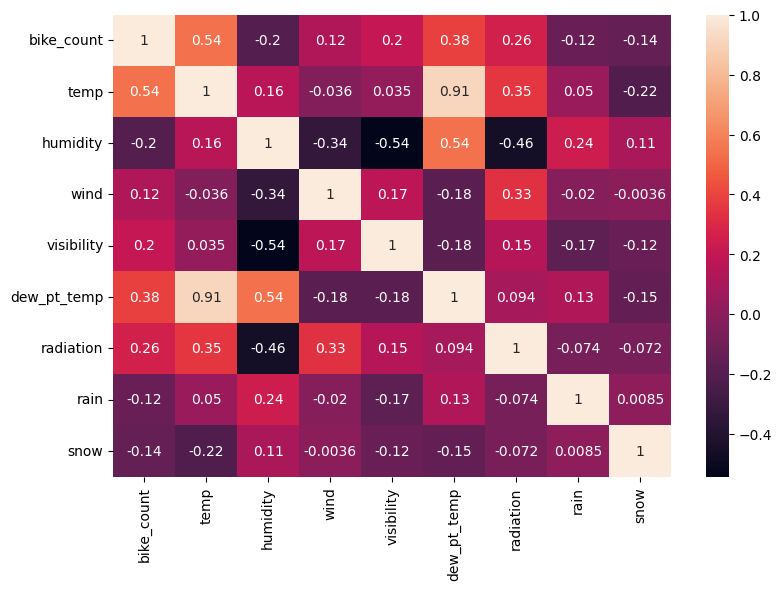

In [ ]:
correlations = df.corr()
plt.figure(figsize=(9,6))
sns.heatmap(correlations, annot=True)
plt.show()